# Creating a neural network from scratch
## Perceptron (one input and one output layer)

Following this website https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/

The problem: see who is diabetic based on whether they smoke, are obese and exercise.

| Person  | Smoking | Obesity | Exercise | Diabetic |
| --------|---------|---------|----------|----------|
| Person 1|0|1|0|1|
| Person 2|0|0|1|0|
| Person 3|1|0|0|0|
| Person 4|1|1|0|1|
| Person 5|1|1|1|1|

Sigmoid function

\begin{align}
\theta_{{X}{\cdot}{W}} = \frac{1}{1+e^{{-X}{\cdot}{W}}}
\end{align}

In [3]:
import numpy as np
from matplotlib import pyplot as plt

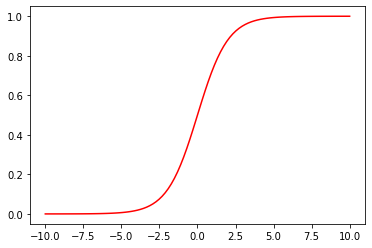

In [7]:
input = np.linspace(-10,10,100)

def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.plot(input, sigmoid(input), c="r");

## Back propagation (minimizing cost)

Need to find the weight and bias values for which the cost function returns the smallest value possible

Use gradient descent to update parameters (weight and bias) https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

## Neural Network Implementation

In [11]:
# create feature set and labels
feature_set = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
labels = np.array([1,0,0,1,1])
labels = labels.reshape(5,1)

In [14]:
# define hyper parameters 
# draws from random uniform distribution
np.random.seed(1991)
weights = np.random.rand(3,1)
bias = np.random.rand(1)
learning_rate = 0.05

In [15]:
# define activation function and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [19]:
# train neural network
print("Errors:")
for epoch in range(20000):
    inputs = feature_set
    
    # feed forward step 1
    XW = np.dot(feature_set,weights) + bias
    
    # feed forward step 2
    z = sigmoid(XW)
    
    # back propagation step 1 - predicted minus actual
    error = z - labels
    print(error.sum())
    
    # back propagation step 2 - differentiate cost function (MSE) with respect to each weight
    dcost_dpred = error
    dpred_dz = sigmoid_der(z)
    
    # derivative of cost function: slope = input * dcost_dpred * dpred_dz
    z_delta = dcost_dpred * dpred_dz
    
    inputs = feature_set.T
    # dz_dw is just the corresponding input since z = x1w1 + x2w2 + x3w3 + b
    # do the below so dont have to loop through each record and multiply the input with corresponding z_delta
    # multiply the learning rate variable with the derivative to increase the speed of convergence
    weights -= learning_rate * np.dot(inputs,z_delta)
    
    # update bias
    for num in z_delta:
        bias -= learning_rate * num

Errors:
0.0008385146954602886
0.0008384942076835357
0.0008384737209176027
0.0008384532351624653
0.0008384327504185668
0.00083841226668456
0.0008383917839617705
0.0008383713022492977
0.0008383508215473439
0.0008383303418553496
0.0008383098631739644
0.0008382893855027329
0.0008382689088417515
0.000838248433190792
0.000838227958549838
0.000838207484918886
0.0008381870122976974
0.0008381665406861534
0.0008381460700846877
0.0008381256004923923
0.0008381051319098264
0.0008380846643370734
0.0008380641977731342
0.0008380437322186548
0.0008380232676735259
0.000838002804137622
0.0008379823416110373
0.00083796188009321
0.0008379414195842346
0.0008379209600839852
0.0008379005015929156
0.0008378800441106657
0.0008378595876365694
0.0008378391321713849
0.0008378186777146645
0.0008377982242661723
0.0008377777718262319
0.0008377573203948337
0.000837736869971295
0.0008377164205557262
0.0008376959721483335
0.0008376755247491109
0.0008376550783575944
0.0008376346329737831
0.0008376141885980057
0.000837593

0.0008120540925572973
0.0008120348893497914
0.0008120156870593306
0.0008119964856857509
0.000811977285228558
0.0008119580856886825
0.0008119388870654297
0.0008119196893585055
0.0008119004925684209
0.0008118812966945652
0.0008118621017373269
0.000811842907696321
0.0008118237145720627
0.0008118045223633776
0.0008117853310713212
0.0008117661406952898
0.0008117469512351205
0.0008117277626912053
0.0008117085750631529
0.0008116893883508003
0.0008116702025542134
0.0008116510176734565
0.000811631833708238
0.0008116126506589562
0.0008115934685244477
0.0008115742873057762
0.0008115551070028912
0.0008115359276147319
0.0008115167491420279
0.0008114975715843896
0.000811478394942557
0.0008114592192147978
0.0008114400444026223
0.0008114208705051959
0.0008114016975225864
0.0008113825254549593
0.0008113633543019305
0.0008113441840633413
0.0008113250147393537
0.0008113058463303669
0.0008112866788355499
0.0008112675122551828
0.0008112483465891069
0.0008112291818372693
0.0008112100179995026
0.000811190855

0.0007883650343833756
0.0007883469454954377
0.0007883288574451145
0.0007883107702330886
0.0007882926838588006
0.0007882745983224873
0.0007882565136238103
0.0007882384297626562
0.0007882203467392563
0.0007882022645537314
0.0007881841832055227
0.0007881661026947519
0.0007881480230215281
0.0007881299441858556
0.0007881118661874093
0.0007880937890258621
0.0007880757127018767
0.0007880576372146847
0.0007880395625649624
0.0007880214887522633
0.0007880034157762509
0.0007879853436371636
0.0007879672723351125
0.0007879492018695458
0.0007879311322412548
0.000787913063449012
0.0007878949954937178
0.0007878769283747016
0.000787858862092412
0.0007878407966466451
0.0007878227320368362
0.000787804668263661
0.0007877866053269053
0.000787768543226243
0.0007877504819616792
0.000787732421533207
0.0007877143619405003
0.0007876963031838045
0.0007876782452633253
0.0007876601881785317
0.0007876421319294108
0.0007876240765163165
0.0007876060219387917
0.0007875879681965309
0.0007875699152903063
0.0007875518632

0.0007667657166548223
0.0007667486144142333
0.0007667315129438693
0.0007667144122436576
0.0007666973123133195
0.0007666802131530166
0.0007666631147625769
0.0007666460171420406
0.0007666289202913693
0.0007666118242102647
0.000766594728899235
0.0007665776343576576
0.0007665605405854752
0.0007665434475831855
0.0007665263553501694
0.0007665092638868137
0.0007664921731927307
0.0007664750832679628
0.0007664579941125613
0.0007664409057262546
0.0007664238181094157
0.0007664067312615503
0.000766389645182817
0.0007663725598730468
0.0007663554753322924
0.0007663383915606017
0.0007663213085574785
0.0007663042263236376
0.0007662871448582426
0.0007662700641614586
0.0007662529842334433
0.0007662359050740232
0.0007662188266833719
0.0007662017490607589
0.0007661846722072339
0.0007661675961219642
0.000766150520804673
0.0007661334462559649
0.0007661163724755581
0.000766099299463063
0.0007660822272190808
0.0007660651557429982
0.0007660480850348733
0.0007660310150948701
0.0007660139459228135
0.000765996877

0.0007437948444652988
0.0007437787608079944
0.0007437626778529537
0.0007437465955999305
0.0007437305140489178
0.000743714433199795
0.0007436983530527581
0.0007436822736071377
0.0007436661948636864
0.0007436501168224001
0.0007436340394824858
0.0007436179628441501
0.000743601886907275
0.0007435858116725085
0.0007435697371390559
0.0007435536633070118
0.0007435375901765941
0.0007435215177475658
0.0007435054460198012
0.0007434893749930687
0.000743473304668129
0.0007434572350439664
0.0007434411661215723
0.0007434250978997064
0.0007434090303792412
0.0007433929635599495
0.0007433768974414844
0.0007433608320237158
0.0007433447673071934
0.0007433287032914508
0.0007433126399763752
0.0007432965773620619
0.0007432805154488232
0.0007432644542358785
0.0007432483937237604
0.0007432323339120177
0.0007432162748009724
0.0007432002163906062
0.0007431841586802504
0.000743168101670656
0.0007431520453612551
0.0007431359897520492
0.000743119934843336
0.0007431038806345802
0.0007430878271259666
0.0007430717743

0.0007263025581021234
0.0007262872288758201
0.000726271900302459
0.0007262565723820599
0.0007262412451148597
0.000726225918500429
0.0007262105925390158
0.0007261952672303045
0.000726179942575087
0.0007261646185720508
0.000726149295222113
0.0007261339725248353
0.0007261186504801294
0.0007261033290879033
0.0007260880083483894
0.0007260726882615046
0.0007260573688272712
0.0007260420500454839
0.0007260267319159353
0.0007260114144387545
0.0007259960976139616
0.0007259807814416902
0.0007259654659214016
0.0007259501510533334
0.0007259348368375065
0.0007259195232738264
0.00072590421036243
0.0007258888981027771
0.0007258735864953342
0.0007258582755397831
0.000725842965236363
0.0007258276555844323
0.00072581234658467
0.000725797038236547
0.0007257817305400815
0.0007257664234955148
0.0007257511171027495
0.0007257358113611449
0.0007257205062714961
0.0007257052018333765
0.0007256898980470307
0.0007256745949115878
0.0007256592924278406
0.0007256439905953729
0.0007256286894145366
0.000725613388884791

0.0007040345667242674
0.0007040201713794207
0.0007040057766286995
0.0007039913824720585
0.0007039769889095517
0.0007039625959406716
0.0007039482035660419
0.0007039338117851551
0.0007039194205981855
0.0007039050300051818
0.0007038906400058699
0.0007038762506005351
0.0007038618617890013
0.0007038474735708879
0.0007038330859464679
0.0007038186989158004
0.0007038043124788307
0.0007037899266353967
0.000703775541385435
0.0007037611567285561
0.0007037467726659381
0.0007037323891960802
0.0007037180063199228
0.0007037036240369731
0.0007036892423471722
0.0007036748612510198
0.0007036604807478053
0.0007036461008376894
0.0007036317215208289
0.0007036173427970756
0.0007036029646664763
0.0007035885871288661
0.0007035742101840822
0.0007035598338330749
0.0007035454580740048
0.0007035310829084911
0.0007035167083352476
0.0007035023343551182
0.0007034879609680474
0.0007034735881732007
0.0007034592159716364
0.0007034448443624074
0.0007034304733457954
0.0007034161029219679
0.0007034017330906518
0.000703387

0.0006830893766311061
0.000683075832599694
0.0006830622891102357
0.0006830487461625869
0.0006830352037566255
0.0006830216618928832
0.0006830081205712263
0.0006829945797912976
0.0006829810395530727
0.0006829674998564145
0.0006829539607015357
0.000682940422088843
0.0006829268840173206
0.0006829133464876166
0.0006828998094995965
0.0006828862730531137
0.0006828727371479392
0.0006828592017845969
0.0006828456669624068
0.0006828321326821235
0.0006828185989429351
0.0006828050657451609
0.0006827915330888945
0.0006827780009738722
0.000682764469400206
0.0006827509383675306
0.0006827374078762658
0.0006827238779262834
0.0006827103485168885
0.0006826968196492894
0.000682683291322447
0.0006826697635368036
0.0006826562362922239
0.0006826427095883341
0.0006826291834257977
0.0006826156578039096
0.0006826021327231103
0.0006825886081829272
0.0006825750841838877
0.0006825615607253107
0.0006825480378077307
0.0006825345154308935
0.0006825209935945598
0.000682507472298817
0.0006824939515440945
0.0006824804313

0.0006633776433824937
0.0006633648765618158
0.0006633521102371153
0.0006633393444079516
0.0006633265790747748
0.0006633138142371452
0.0006633010498955094
0.000663288286049322
0.0006632755226989185
0.000663262759844083
0.0006632499974849326
0.0006632372356213624
0.0006632244742532656
0.0006632117133810863
0.0006631989530040544
0.0006631861931227275
0.0006631734337366781
0.000663160674846011
0.0006631479164510698
0.0006631351585510894
0.0006631224011463916
0.000663109644237327
0.0006630968878233428
0.0006630841319047748
0.0006630713764812978
0.0006630586215531399
0.000663045867119857
0.000663033113181913
0.0006630203597389698
0.0006630076067913578
0.0006629948543385418
0.0006629821023805185
0.00066296935091807
0.0006629565999500967
0.0006629438494770478
0.0006629310994991557
0.0006629183500157475
0.0006629056010279445
0.0006628928525345291
0.0006628801045356278
0.0006628673570314549
0.0006628546100223556
0.0006628418635080012
0.0006628291174877307
0.0006628163719624479
0.0006628036269320

0.0006447690584795475
0.0006447570040634572
0.0006447449501019702
0.0006447328965954431
0.000644720843543686
0.0006447087909465079
0.0006446967388039305
0.0006446846871162124
0.000644672635883272
0.0006446605851046887
0.0006446485347807156
0.0006446364849113772
0.0006446244354963828
0.000644612386535859
0.0006446003380300635
0.0006445882899786884
0.0006445762423815454
0.0006445641952386588
0.0006445521485508379
0.000644540102316779
0.0006445280565370659
0.0006445160112117237
0.0006445039663405643
0.0006444919219237271
0.0006444798779610197
0.0006444678344528073
0.0006444557913983361
0.0006444437487980849
0.0006444317066521864
0.0006444196649602312
0.0006444076237225793
0.0006443955829385992
0.0006443835426087558
0.0006443715027329693
0.0006443594633111635
0.0006443474243431431
0.0006443353858289341
0.0006443233477688003
0.0006443113101625327
0.0006442992730101632
0.000644287236311286
0.0006442752000664796
0.0006442631642753355
0.0006442511289378693
0.0006442390940542423
0.0006442270596

0.000627196021595138
0.0006271846209523861
0.0006271732207275343
0.0006271618209213949
0.000627150421533022
0.0006271390225624706
0.000627127624010234
0.0006271162258762418
0.0006271048281599944
0.0006270934308616558
0.0006270820339813856
0.0006270706375191221
0.0006270592414749114
0.0006270478458483678
0.0006270364506400852
0.0006270250558493388
0.0006270136614764067
0.0006270022675212155
0.0006269908739841611
0.0006269794808646204
0.0006269680881627517
0.0006269566958789436
0.0006269453040124691
0.0006269339125635903
0.0006269225215330323
0.0006269111309194029
0.0006268997407236345
0.0006268883509455521
0.0006268769615847725
0.0006268655726414441
0.000626854184116071
0.0006268427960078103
0.00062683140831716
0.0006268200210442776
0.000626808634188656
0.0006267972477497887
0.0006267858617289568
0.000626774476125423
0.0006267630909388006
0.0006267517061699056
0.000626740321818023
0.0006267289378835278
0.000626717554366254
0.0006267061712661383
0.0006266947885831152
0.000626683406317791

0.0006105525545085201
0.0006105417560625633
0.0006105309580021288
0.0006105201603270609
0.000610509363037315
0.0006104985661325195
0.0006104877696134024
0.000610476973479478
0.0006104661777305898
0.0006104553823668007
0.0006104445873885245
0.0006104337927951564
0.0006104229985872036
0.0006104122047640719
0.0006104014113261632
0.0006103906182735432
0.0006103798256056111
0.0006103690333228813
0.0006103582414249834
0.0006103474499125302
0.000610336658784817
0.0006103258680421322
0.000610315077683987
0.0006103042877110059
0.0006102934981230381
0.0006102827089201476
0.0006102719201014017
0.0006102611316679846
0.000610250343619289
0.0006102395559553901
0.0006102287686764658
0.0006102179817820256
0.0006102071952724707
0.0006101964091474264
0.0006101856234070721
0.0006101748380515888
0.0006101640530805932
0.0006101532684942672
0.0006101424842923525
0.0006101317004755732
0.000610120917042674
0.0006101101339947173
0.0006100993513310981
0.0006100885690522289
0.0006100777871578394
0.00061006700564

0.0005947870368174647
0.0005947767935668025
0.0005947665506714547
0.0005947563081326089
0.000594746065949359
0.0005947358241224486
0.0005947255826508533
0.000594715341535317
0.0005947051007754861
0.0005946948603713278
0.0005946846203233728
0.0005946743806305894
0.0005946641412938446
0.0005946539023128821
0.0005946436636872386
0.0005946334254176553
0.000594623187503333
0.0005946129499450207
0.000594602712742239
0.0005945924758948527
0.0005945822394030566
0.0005945720032668302
0.0005945617674859133
0.000594551532061176
0.0005945412969914766
0.000594531062277452
0.0005945208279188518
0.0005945105939153209
0.0005945003602676052
0.0005944901269754567
0.0005944798940384025
0.0005944696614565257
0.0005944594292305707
0.0005944491973595241
0.0005944389658436768
0.0005944287346833438
0.00059441850387827
0.0005944082734285414
0.000594398043334019
0.0005943878135945694
0.0005943775842106019
0.0005943673551813168
0.0005943571265076865
0.0005943468981889038
0.0005943366702254932
0.00059432644261709

0.0005798121041079842
0.0005798023744937493
0.0005797926452088768
0.0005797829162536897
0.0005797731876272796
0.0005797634593304188
0.0005797537313629803
0.0005797440037249506
0.0005797342764160855
0.0005797245494361526
0.000579714822786034
0.0005797050964648177
0.0005796953704729395
0.0005796856448101653
0.0005796759194766953
0.000579666194472305
0.0005796564697970797
0.000579646745450902
0.000579637021434088
0.0005796272977460649
0.0005796175743869409
0.0005796078513575767
0.0005795981286565205
0.0005795884062848684
0.0005795786842422782
0.0005795689625284033
0.0005795592411442212
0.0005795495200884987
0.0005795397993612261
0.0005795300789632751
0.0005795203588948566
0.0005795106391545107
0.0005795009197434474
0.0005794912006607655
0.0005794814819074451
0.0005794717634828067
0.0005794620453869557
0.0005794523276197562
0.0005794426101814265
0.0005794328930722806
0.000579423176291199
0.0005794134598392721
0.0005794037437158225
0.0005793940279212777
0.0005793843124556287
0.0005793745973

0.0005655880530180384
0.0005655787989173478
0.0005655695451220102
0.0005655602916321348
0.0005655510384478301
0.0005655417855688748
0.0005655325329952635
0.0005655232807271061
0.0005655140287640723
0.0005655047771065983
0.0005654955257544661
0.0005654862747074465
0.0005654770239656446
0.0005654677735295087
0.0005654585233981499
0.0005654492735727829
0.0005654400240518625
0.0005654307748368193
0.0005654215259262131
0.0005654122773213689
0.0005654030290215125
0.0005653937810267485
0.0005653845333375256
0.0005653752859531664
0.0005653660388739005
0.0005653567920996111
0.000565347545630744
0.0005653382994664112
0.0005653290536074941
0.0005653198080536551
0.0005653105628046738
0.0005653013178608772
0.0005652920732219383
0.0005652828288881858
0.0005652735848589519
0.000565264341134894
0.0005652550977156877
0.0005652458546015547
0.000565236611792262
0.0005652273692879212
0.0005652181270884189
0.0005652088851935402
0.0005651996436039416
0.0005651904023189517
0.0005651811613386877
0.00056517192

In [25]:
weights

array([[-0.51592661],
       [13.10648901],
       [-0.86648662]])

In [26]:
bias

array([-5.53748856])

## Do a prediction with trained model

In [20]:
# smokes, not obese, does not exercise
person_6_input = np.array([1,0,0])
person_6_predict = sigmoid(np.dot(person_6_input, weights) + bias)
print(person_6_predict)

[0.00234431]


In [ ]:
# does not smoke, is obese, does not exercise

In [27]:
person_7_input = np.array([0,1,0])
person_7_predict = sigmoid(np.dot(person_7_input, weights) + bias)
print(person_7_predict)

[0.99948406]
